In [2]:
import soapy
import matplotlib.pyplot as plt
import numpy as np
import yaml
from collections import OrderedDict

In [3]:
def str_presenter(dumper, data):
    if isinstance(data, list):
        return dumper.represent_sequence(u'tag:yaml.org,2002:seq', data, flow_style=True)
    return dumper.represent_data(data)

yaml.add_representer(list, str_presenter)

In [4]:
def convert_ordered_dict(obj):
    if isinstance(obj, OrderedDict):
        return {k: convert_ordered_dict(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_ordered_dict(i) for i in obj]
    elif isinstance(obj, dict):
        return {k: convert_ordered_dict(v) for k, v in obj.items()}
    else:
        return obj

In [5]:
phase_map_file = "proc_val_2.fits"

atmosphere = {
    'scrnNo':1,
    'scrnHeights': [0],
    'scrnStrengths': [1.0],
    'windDirs': [0.0],
    'windSpeeds': [0.0],
    'r0': 0.15,
    'scrnNames': [phase_map_file],
    'subHarmonics': False,
    'L0': [30.0],
    'randomScrns': False,
    'infinite': False,
    'wholeScrnSize': 502
}

telescope = {
    'telDiam': 0.1
}

dm0 = {
    'type': 'FastPiezo',
    'nxActuators': 2,
    'gain': 0.6,
    'iMatValue': 500
}

wfs0 = {
    'GSPosition': [0, 0],
    'wavelength': 200e-9,
    'nxSubaps': 10
}

sci0 = {
    'position': [0,0],
    'FOV': 0.5,
    'wavelength': 200e-9,
    'pxls': 502
}

reconstructor = {
    'type': 'MVM',
    'svdConditioning': 0,
    'gain': 0.6,
    'imat_noise': True
}

dm_section = OrderedDict()
dm_section[0] = dm0

wfs_section = OrderedDict()
wfs_section[0] = wfs0

sci_section = OrderedDict()
sci_section[0] = sci0

proc_result = OrderedDict()
proc_result['simName'] = 'PROC_RESULT'
proc_result['pupilSize'] = 502
proc_result['nIters'] = 100
proc_result['loopTime'] = 0.00125
proc_result['nDM'] = 1
proc_result['nSci'] = 1
proc_result['nGS'] = 1
proc_result['saveSciencePsf'] = True
proc_result['saveInstPsf'] = True
proc_result['reconstructor'] = 'MVM'

proc_result['Atmosphere'] = atmosphere
proc_result['Telescope'] = telescope
proc_result['DM'] = dm_section
proc_result['WFS'] = wfs_section
proc_result['Science'] = sci_section
proc_result['Reconstructor'] = reconstructor

proc_result = convert_ordered_dict(proc_result)

with open("proc_result.yaml", "w") as f:
    yaml.dump(proc_result, f, sort_keys=False, default_flow_style=False)

print("done :)")


done :)


In [6]:
sim = soapy.Sim("proc_result.yaml")
print("success! :)")

success! :)


In [7]:
sim.aoinit()

Starting Sim: 2025-05-08-13-30-42
Pixel Scale: 5020.00 pxls/m
subScreenSize: 512 simulation pixels
Creating mask...


c:\Users\yuris\anaconda3\envs\soapy-env\lib\site-packages\soapy\atmosphere.py:120: RuntimeWarning: divide by zero encountered in scalar divide
  tau0 = 0.314 * self.r0 / vBar53


Turbulence summary @ 500 nm:
| r0 = 0.15 m (0.69" seeing)
| Vbar_5/3 = 0.00 m/s
| tau0 = inf ms
Loading Phase Screens
c:\Users\yuris\anaconda3\envs\soapy-env\lib\site-packages\soapy\atmosphere.py -> __init__: no r0 info found in screen header - will assume its ok as it is
c:\Users\yuris\anaconda3\envs\soapy-env\lib\site-packages\soapy\atmosphere.py -> __init__: Requested phase screen has different size to that input in config file....loading anyway
Initialising WFSs....
WFS 0: 160 measurements
Initialising 1 DMs...
Making DM Influence Functions...
DM 0: 4 active actuators
4 total DM Actuators
Initialising Reconstructor...
Initialising 1 Science Cams...
Generating fftw3 plan....
If this takes too long, change fftw_FLAGS.
Done!


c:\Users\yuris\anaconda3\envs\soapy-env\lib\site-packages\soapy\SCI.py:153: RuntimeWarning: invalid value encountered in divide
  self.detector /= self.detector.sum()


Initialise Data Storage...
Initialisation Complete!


In [8]:
print(f"DMs: {sim.recon.dms}")
print(f"WFSs: {sim.recon.wfss}")
sim.makeIMat()

DMs: {0: <soapy.DM.FastPiezo object at 0x0000025BF0011100>}
WFSs: {0: <soapy.wfs.shackhartmann.ShackHartmann object at 0x0000025BBB989D60>}
Making interaction Matrices...
Load Interaction Matrices failed with error: Traceback (most recent call last):
  File "c:\Users\yuris\anaconda3\envs\soapy-env\lib\site-packages\soapy\reconstruction.py", line 363, in makeCMat
    self.load_interaction_matrix()
  File "c:\Users\yuris\anaconda3\envs\soapy-env\lib\site-packages\soapy\reconstruction.py", line 208, in load_interaction_matrix
    imat_header = fits.getheader(filename)
  File "c:\Users\yuris\anaconda3\envs\soapy-env\lib\site-packages\astropy\io\fits\convenience.py", line 121, in getheader
    hdulist, extidx = _getext(filename, mode, *args, **kwargs)
  File "c:\Users\yuris\anaconda3\envs\soapy-env\lib\site-packages\astropy\io\fits\convenience.py", line 1121, in _getext
    hdulist = fitsopen(filename, mode=mode, **kwargs)
  File "c:\Users\yuris\anaconda3\envs\soapy-env\lib\site-packages\as

In [9]:
sim.aoloop()

c:\Users\yuris\anaconda3\envs\soapy-env\lib\site-packages\soapy\SCI.py:153: RuntimeWarning: invalid value encountered in divide
  self.detector /= self.detector.sum()


100 of 100: PROC_RESULT  Strehl -- sci_0: inst nan, long nan 


Science Camera 0: Long Exposure Strehl Ratio: nan
                  EE50 diameter [mas]: 0


Time moving atmosphere: 8.30
Time making IMats and CMats: 1.60
Time in WFS: 6.29
	 of which time spent in : 0.00
Time in Reconstruction: 0.01
Time in DM: 2.20
Time making science image: 12.62




Min: nan
Max: nan
Mean: nan


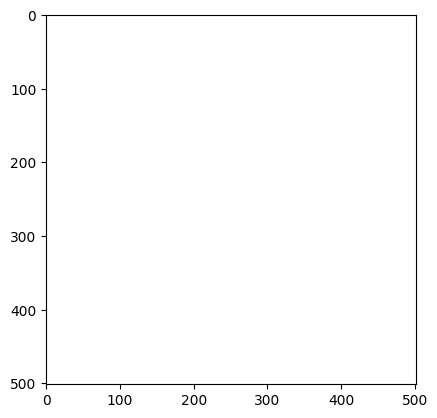

In [10]:
print("Min:", np.min(sim.sciImgs[0]))
print("Max:", np.max(sim.sciImgs[0]))
print("Mean:", np.mean(sim.sciImgs[0]))

plt.imshow(sim.sciImgs[0])

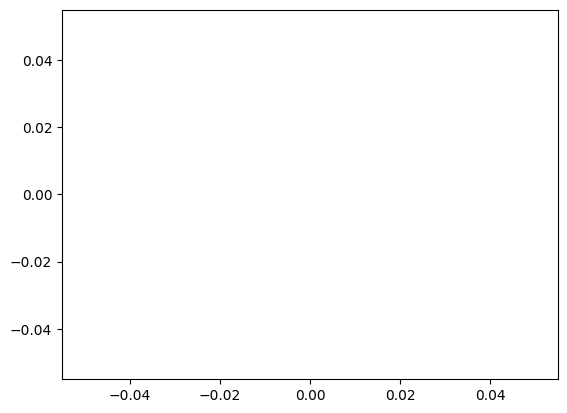

In [11]:
plt.plot(sim.longStrehl[0])